## Importações

In [19]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.metrics import accuracy_score,classification_report, f1_score, confusion_matrix,recall_score,precision_score
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_oneway, f_regression, r_regression
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

## Funções Comuns

In [20]:
def funcPlotMatriz(y_test, classificar):
    matriz_de_confusao = confusion_matrix(y_test, classificar)
    sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
    plt.show()


def funcMetricas(df_metricas,modelo_Versao, df,Hyper_Parametros,y_test, classificar):
    metricas = [
        modelo_Versao,
        df,
        Hyper_Parametros,
        accuracy_score(y_test, classificar), 
        round(recall_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(precision_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(f1_score(y_test, classificar, pos_label=0,average='macro'),2)
        ]
    
    nova_linha_df = pd.DataFrame([metricas], columns=df_metricas.columns)

    df_metricas = pd.concat([df_metricas, nova_linha_df], ignore_index=True)
    
    return df_metricas


## Extraindo a Base

In [21]:
df_original = pd.read_excel('../Data Cleaning AED/Base_format.xlsx')

df = df_original.copy()

display(df)

,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ,Status Operacional
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
2,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
3,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
4,RJ,Outros,5.0,ITAGUAI,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
...,...,...,...,...,...,...,...,...,...,...
13430,RJ,Não Informado,1.0,RIO DE JANEIRO,Outras atividades de serviços pessoais não esp...,Sociedade Mercantil de Capital e Indústria,1988,9,18,Irregular
13431,DF,Não Informado,5.0,BRASILIA,Tabacaria,Sociedade Mercantil de Capital e Indústria,1989,4,10,Ativa
13432,RJ,Não Informado,5.0,RIO DE JANEIRO,Atividade Econônica não informada,Sociedade Empresária em Comandita por Ações,1973,4,16,Ativa
13433,RJ,Não Informado,5.0,RIO DE JANEIRO,Serviços advocatícios,Fundo Público da Administração Direta Estadual...,1988,9,21,Encerrada


### Dividindo o Dataframe em Valor Explicativo e Resposta

In [22]:
df_x = df.drop('Status Operacional', axis=1)
df_y = df['Status Operacional']

df_x = pd.DataFrame(df_x)
df_y = pd.DataFrame(df_y)

df_y = pd.DataFrame(df_y)
display(df_x)
display(df_y)

,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
2,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
3,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
4,RJ,Outros,5.0,ITAGUAI,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1
...,...,...,...,...,...,...,...,...,...
13430,RJ,Não Informado,1.0,RIO DE JANEIRO,Outras atividades de serviços pessoais não esp...,Sociedade Mercantil de Capital e Indústria,1988,9,18
13431,DF,Não Informado,5.0,BRASILIA,Tabacaria,Sociedade Mercantil de Capital e Indústria,1989,4,10
13432,RJ,Não Informado,5.0,RIO DE JANEIRO,Atividade Econônica não informada,Sociedade Empresária em Comandita por Ações,1973,4,16
13433,RJ,Não Informado,5.0,RIO DE JANEIRO,Serviços advocatícios,Fundo Público da Administração Direta Estadual...,1988,9,21


,Status Operacional
0,Encerrada
1,Encerrada
2,Encerrada
3,Encerrada
4,Encerrada
...,...
13430,Irregular
13431,Ativa
13432,Ativa
13433,Encerrada


### Transformando os Dados Qualitativos em Quantitativos

In [23]:
label_encolder = LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('categoria', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))
    ],
    remainder='passthrough',  # Mantém as outras colunas inalteradas
    verbose_feature_names_out=False,  # Mantém os nomes originais das colunas
    
)

# Ajustar e transformar o DataFrame usando o preprocessador
df_x_encoded = preprocessador.fit_transform(df_x)

df_y_encoded = label_encolder.fit_transform(df_y)

# Se necessário, converter o resultado de volta para um DataFrame, mantendo os nomes das colunas
df_x_encoded = pd.DataFrame(df_x_encoded, columns=preprocessador.get_feature_names_out())
# Matém a ordem do df original
df_x_encoded = df_x_encoded[df_x.columns]

df_y_encoded = pd.DataFrame(df_y_encoded, columns=df_y.columns)

# df_x_encoded=df_x_encoded[df_x.columns]

df_encoded = df_x_encoded.copy()
df_encoded['Status Operacional']=df_y_encoded
df_encoded

display(df_x_encoded)
display(df_y_encoded)

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ
0,14.0,3.0,5.0,757.0,236.0,19.0,1970.0,1.0,1.0
1,4.0,3.0,5.0,337.0,236.0,19.0,1970.0,1.0,1.0
2,4.0,3.0,5.0,337.0,236.0,19.0,1970.0,1.0,1.0
3,4.0,3.0,5.0,337.0,236.0,19.0,1970.0,1.0,1.0
4,17.0,3.0,5.0,427.0,236.0,19.0,1970.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
13430,17.0,2.0,1.0,784.0,528.0,24.0,1988.0,9.0,18.0
13431,5.0,2.0,5.0,133.0,636.0,24.0,1989.0,4.0,10.0
13432,17.0,2.0,5.0,784.0,21.0,22.0,1973.0,4.0,16.0
13433,17.0,2.0,5.0,784.0,601.0,15.0,1988.0,9.0,21.0


,Status Operacional
0,1
1,1
2,1
3,1
4,1
...,...
13430,2
13431,0
13432,0
13433,1


#### Dividindo os DataFrames de Teste e Treino

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y_encoded, test_size=0.25,random_state=42,shuffle=True)

# Salva o array na memoria para guardar a ordem das colunas
# X_train = np.ascontiguousarray(X_train)
# X_test = np.ascontiguousarray(X_test)


In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

## Modelo Decision Tree

## Teste Simples

In [26]:
classificador_tree = DecisionTreeClassifier()

scores = cross_validate(classificador_tree, X_train, y_train, cv=5, scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
chaves = ['test_accuracy','test_precision_macro','test_recall_macro','test_f1_macro']

scores_avg = [scores[chave].mean() for chave in chaves] 

print(scores)
print(scores_avg)


{'fit_time': array([0.18589282, 0.1048882 , 0.10576415, 0.12341523, 0.12158918]), 'score_time': array([0.04847908, 0.04097104, 0.03850937, 0.04286838, 0.04309654]), 'test_accuracy': array([0.73115079, 0.72307692, 0.73399504, 0.72109181, 0.71563275]), 'test_precision_macro': array([0.5550915 , 0.55162135, 0.56308466, 0.53543999, 0.53119215]), 'test_recall_macro': array([0.55327915, 0.56140464, 0.57429458, 0.54249735, 0.53249716]), 'test_f1_macro': array([0.55383723, 0.5562585 , 0.56825528, 0.53846181, 0.53172946])}
[0.7249894639410768, 0.5472859290933603, 0.5527945760896166, 0.5497084552831712]


In [27]:
classificador_tree.fit(X_train, y_train)
classificar = classificador_tree.predict(X_test)
print(classification_report(y_test,classificar))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2386
           1       0.49      0.49      0.49       457
           2       0.37      0.35      0.36       516

    accuracy                           0.72      3359
   macro avg       0.56      0.56      0.56      3359
weighted avg       0.71      0.72      0.71      3359



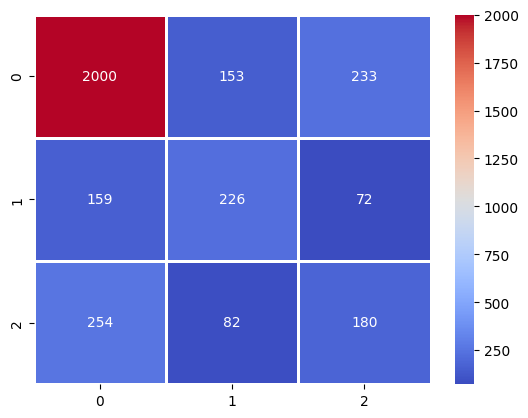

In [28]:
funcPlotMatriz(y_test, classificar)

## Entendendo o Resultado do Modelo

### Distribuição dos Dados

In [29]:
display(df.columns)

Index(['UF', 'Porte Empresa', 'Capital Social', 'municipios', 'cnaes',
       'Natureza Juridica', 'ano inicio_ativ', 'mes inicio_ativ',
       'dia inicio_ativ', 'Status Operacional'],
      dtype='object')

### Correlação das Variáveis

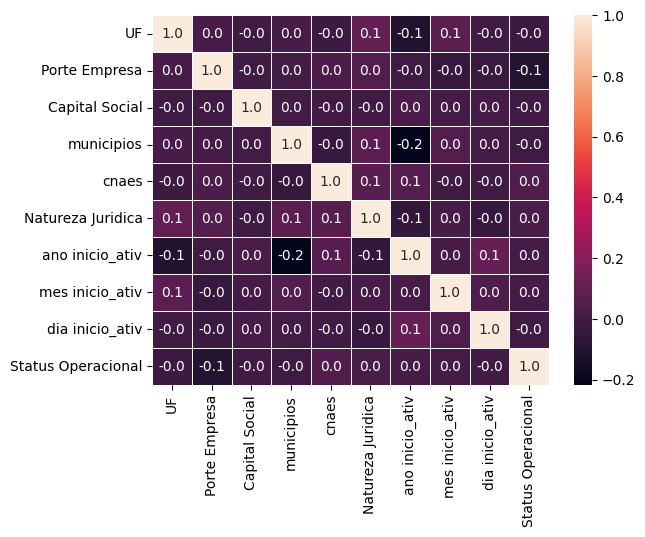

In [30]:
correlation = df_encoded[df_encoded.columns.to_list()].corr()

sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.show()

Plotando a matriz de correlação é possivel dizer que as variaveis são independentes, por que todas contem uma correlação muito próxima a 0

## Teste do Modelo Embazado Nos Resultados Anteriores e em Obter o Melhor Desempenho Possível do Modelo

### Importando e Tratando Todas as Bases Alteradas na Análise Axploratória (Bases com tipos de normalizações diferentes)

In [31]:
lista_df = [] # Lista para armazenar os dfs

In [32]:
lista_df.append(df)

df_capping = pd.read_excel('../Data Cleaning AED/Bases/Base_capping.xlsx')
display(df_capping.head(2))
lista_df.append(df_capping)

df_iqr = pd.read_excel('../Data Cleaning AED/Bases/Base_iqr.xlsx')
display(df_iqr.head(2))
lista_df.append(df_iqr)

df_log = pd.read_excel('../Data Cleaning AED/Bases/Base_log.xlsx')
display(df_log.head(2))
lista_df.append(df_log)

df_raiz = pd.read_excel('../Data Cleaning AED/Bases/Base_sqrt.xlsx')
display(df_raiz.head(2))
lista_df.append(df_raiz)


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ,Status Operacional
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ,Status Operacional
0,PE,Outros,5.0,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
1,CE,Outros,5.0,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ,Status Operacional
0,PE,Outros,1.609438,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
1,CE,Outros,1.609438,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada


,UF,Porte Empresa,Capital Social,municipios,cnaes,Natureza Juridica,ano inicio_ativ,mes inicio_ativ,dia inicio_ativ,Status Operacional
0,PE,Outros,2.236068,RECIFE,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada
1,CE,Outros,2.236068,FORTALEZA,Comércio varejista especializado de eletrodomé...,Sociedade Anônima Aberta,1970,1,1,Encerrada


In [33]:
df_capping.columns

Index(['UF', 'Porte Empresa', 'Capital Social', 'municipios', 'cnaes',
       'Natureza Juridica', 'ano inicio_ativ', 'mes inicio_ativ',
       'dia inicio_ativ', 'Status Operacional'],
      dtype='object')

In [34]:
for k,v in enumerate(lista_df):
    ordem_colunas = lista_df[k].columns
    lista_df[k] = preprocessador.fit_transform(v)
    lista_df[k] = pd.DataFrame(lista_df[k], columns=preprocessador.get_feature_names_out())
    lista_df[k] = lista_df[k][ordem_colunas]


### PIPELINE

In [35]:
classificador_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Esta pipeline será utilizada para, organizar os passos de transformação de dados e para tentar aplicar o melhor modelo possivel nas condições do nosso caso. Além disso, ela também é muito util para replicar o processo em outros modelos. 

### Explicação da Pipe

df_metricas: DataFrame para armazenar o nome do modelo, a base de dados utilizada, as métricas de teste, e a melhor combinação de hiperparâmetros encontrada para cada base de dados.

pipe: Variável que armazena o pipeline completo, contendo todas as etapas de pré-processamento e modelo.

StandardScaler: Centraliza e normaliza os dados, subtraindo a média e dividindo pelo desvio padrão, o que torna a dispersão dos dados mais uniforme.
SelectKBest: Seleciona as variáveis mais importantes, reduzindo a dimensionalidade para facilitar a interpretação e reduzir o número de perguntas aos usuários.
PCA (Principal Component Analysis): Reduz a dimensionalidade após o SelectKBest, preservando a variância máxima.
DecisionTreeClassifier: Modelo de árvore de decisão utilizado após a redução de dimensionalidade.
params_pipe: Dicionário com os parâmetros da pipeline para otimização.

SelectKBest__k e pca__n_components: Definem a quantidade de variáveis a serem mantidas na redução dimensional.
SelectKBest__score_func: Função de avaliação para selecionar as variáveis mais relevantes.
model__criterion, model__max_depth, model__min_samples_split, e model__min_samples_leaf: Hiperparâmetros específicos da árvore de decisão para otimizar a capacidade de generalização.
valores_k: Lista que define o número máximo de variáveis a serem selecionadas (até 10) pelo SelectKBest.

GridSearchCV: Realiza uma busca em grade sobre diferentes combinações de hiperparâmetros na pipeline, aplica validação cruzada e seleciona a melhor combinação com base na acurácia.

## Pipe Nova

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1600 fits failed out of a total of 8800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^

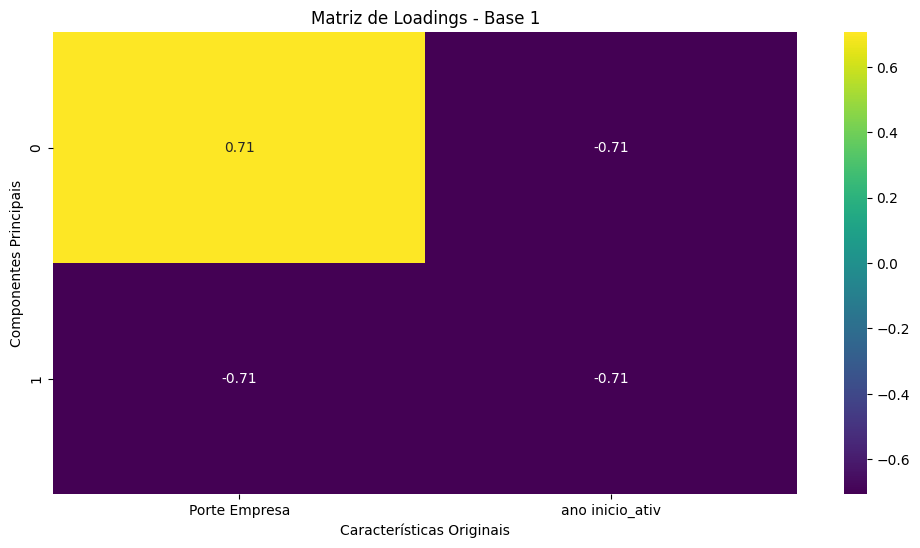

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Melhores parâmetros (Base 1): {'SelectKBest__k': 2, 'SelectKBest__score_func': <function f_classif at 0x00000220F8AEAD40>, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'pca__n_components': 2}
Melhor acurácia (Base 1): 0.7527783193509
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84      2386
         1.0       0.58      0.33      0.42       457
         2.0       0.00      0.00      0.00       516

    accuracy                           0.73      3359
   macro avg       0.44      0.43      0.42      3359
weighted avg       0.61      0.73      0.66      3359



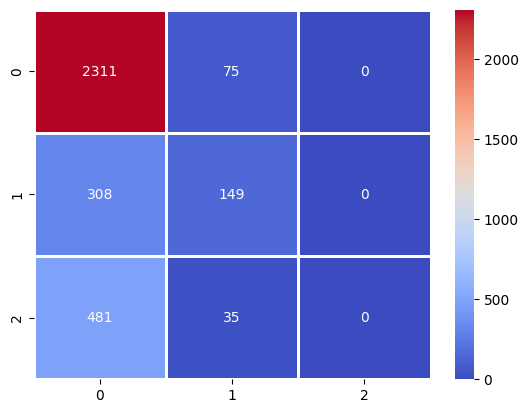

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\P

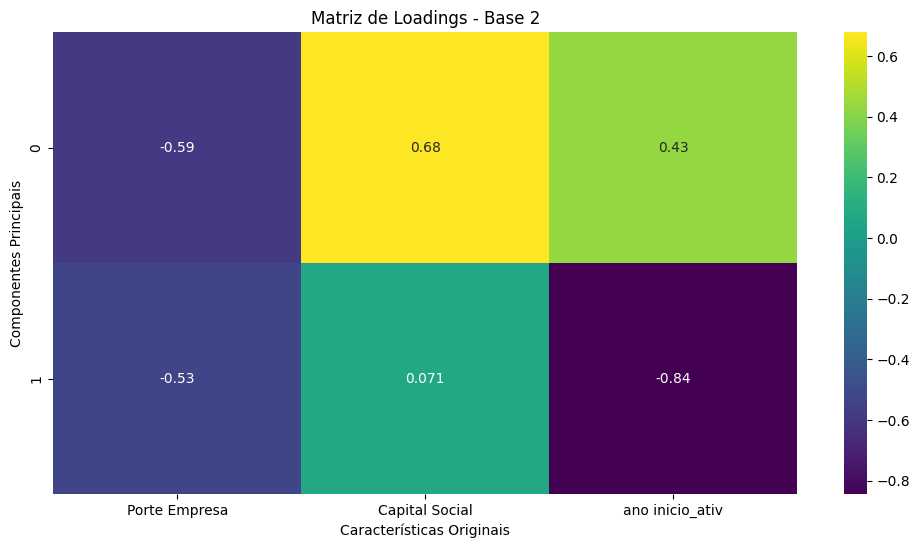

Melhores parâmetros (Base 2): {'SelectKBest__k': 3, 'SelectKBest__score_func': <function f_classif at 0x00000220F8AEAD40>, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'pca__n_components': 2}
Melhor acurácia (Base 2): 0.7574437256292095
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2386
         1.0       0.56      0.40      0.47       457
         2.0       0.46      0.19      0.26       516

    accuracy                           0.74      3359
   macro avg       0.60      0.51      0.53      3359
weighted avg       0.70      0.74      0.71      3359



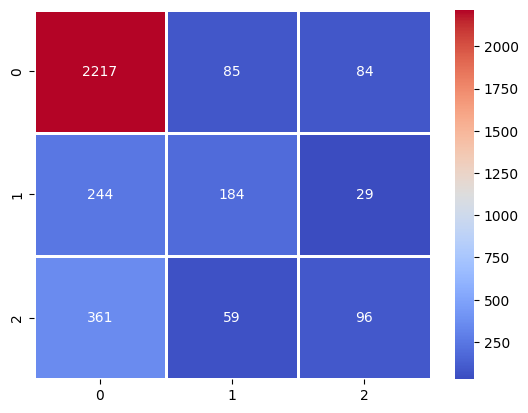

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packa

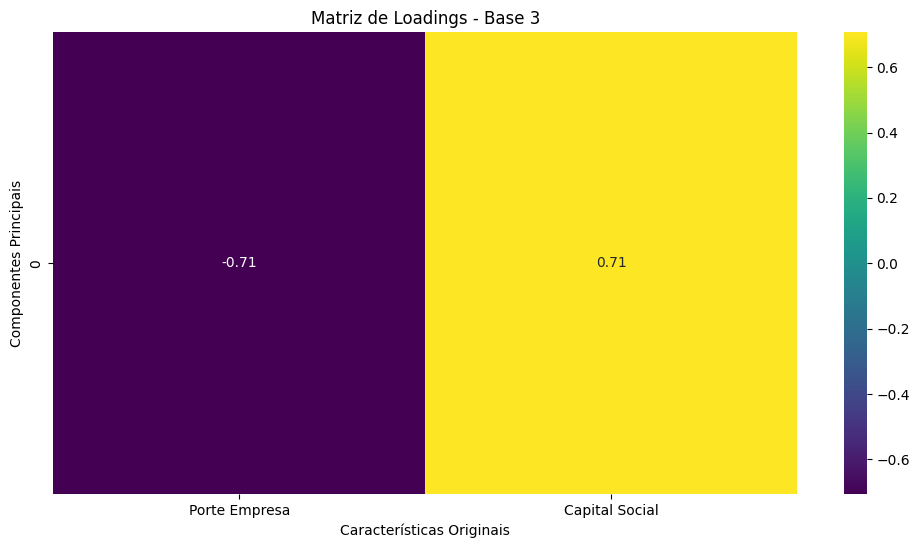

Melhores parâmetros (Base 3): {'SelectKBest__k': 2, 'SelectKBest__score_func': <function f_classif at 0x00000220F8AEAD40>, 'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'pca__n_components': 1}
Melhor acurácia (Base 3): 0.7633504621643059
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      2399
         1.0       0.54      0.23      0.32       408
         2.0       0.45      0.60      0.52       452

    accuracy                           0.76      3259
   macro avg       0.61      0.57      0.57      3259
weighted avg       0.75      0.76      0.75      3259



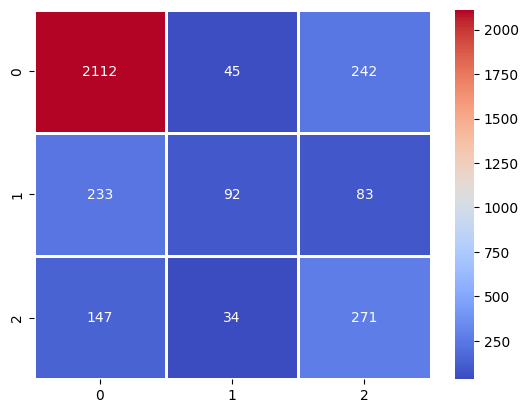

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packa

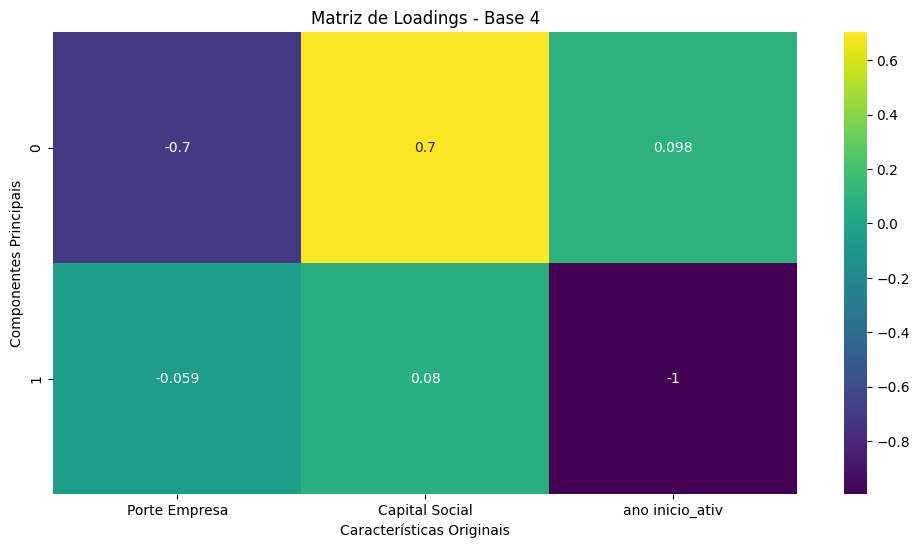

Melhores parâmetros (Base 4): {'SelectKBest__k': 3, 'SelectKBest__score_func': <function f_classif at 0x00000220F8AEAD40>, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'pca__n_components': 2}
Melhor acurácia (Base 4): 0.7565509177202726
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2386
         1.0       0.56      0.40      0.47       457
         2.0       0.47      0.19      0.27       516

    accuracy                           0.74      3359
   macro avg       0.61      0.51      0.53      3359
weighted avg       0.71      0.74      0.71      3359



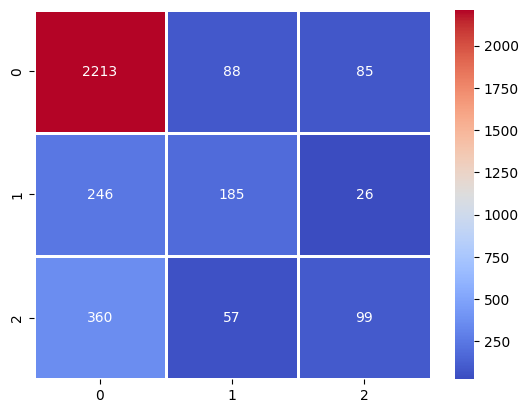

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packa

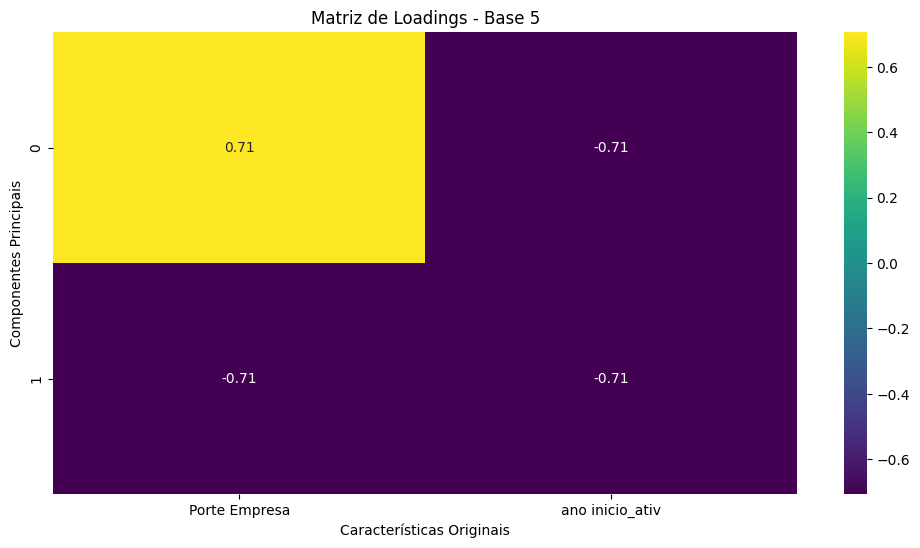

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Melhores parâmetros (Base 5): {'SelectKBest__k': 2, 'SelectKBest__score_func': <function f_classif at 0x00000220F8AEAD40>, 'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'pca__n_components': 2}
Melhor acurácia (Base 5): 0.7527783193509
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84      2386
         1.0       0.58      0.33      0.42       457
         2.0       0.00      0.00      0.00       516

    accuracy                           0.73      3359
   macro avg       0.44      0.43      0.42      3359
weighted avg       0.61      0.73      0.66      3359



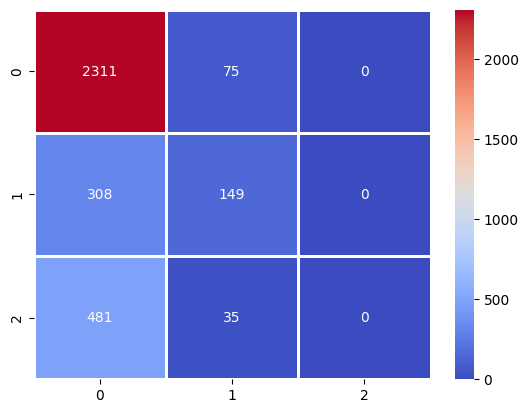

c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\davicavalcante-ieg\AppData\Local\P

,Modelo,DF,Hyper_Parametros,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.732361,0.43,0.44,0.42
1,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 3, 'SelectKBest__score_func...",0.743376,0.51,0.60,0.53
2,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.759435,0.57,0.61,0.57
3,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 3, 'SelectKBest__score_func...",0.743376,0.51,0.61,0.53
4,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.732361,0.43,0.44,0.42


A melhor base foi a Base 3 com acurácia de 0.7633504621643059


In [36]:
import pickle
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame para armazenar as métricas
df_metricas = pd.DataFrame(columns=['Modelo', 'DF', 'Hyper_Parametros', 'Acuracia', 'Recall_Media', 'Precision_Media', 'F1_Score_Media'])

# Variáveis para armazenar o melhor modelo e sua acurácia
melhor_acuracia = 0
melhor_classificador = None
melhor_base = None

for i, data_frame in enumerate(lista_df):
    X_train, X_test, y_train, y_test = train_test_split(data_frame[data_frame.columns[:-1]], data_frame['Status Operacional'], test_size=0.25, random_state=42, shuffle=True)
    
    # Pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('SelectKBest', SelectKBest()),
        ('pca', PCA()),
        ('model', DecisionTreeClassifier())  # DecisionTreeClassifier
    ])
    
    # Hiperparâmetros
    params_pipe = []
    valores_k = range(1, 11)

    for k in valores_k:
        for n in range(1, k + 1):
            params_pipe.append({
                'SelectKBest__k': [k],
                'pca__n_components': [n],
                'SelectKBest__score_func': [f_classif],
                'model__criterion': ['gini', 'entropy'],  # Hiperparâmetros da árvore de decisão
                'model__max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
                'model__min_samples_split': [2, 5],  # Mínimo de amostras para dividir um nó
                'model__min_samples_leaf': [2, 4],  # Mínimo de amostras por folha
            })

    # Busca em grade
    grid_search = GridSearchCV(estimator=pipe, param_grid=params_pipe, n_jobs=-1, scoring='accuracy')

    # Treinar o modelo
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado para essa base
    classificador_grafico = grid_search.best_estimator_
    
    # Avaliação do modelo
    previsao = classificador_grafico.predict(X_test)
    acuracia = grid_search.best_score_

    # Comparar com a melhor acurácia até agora
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_classificador = classificador_grafico
        melhor_base = i  # Guardar o índice da melhor base

    # PCA para análise
    pca = classificador_grafico.named_steps['pca']
    kBest = classificador_grafico.named_steps['SelectKBest']
    
    components_df = pd.DataFrame(pca.components_, columns=data_frame.columns[kBest.get_support(indices=True).tolist()])

    # Plotagem da Matriz de Loadings
    plt.figure(figsize=(12, 6))
    sns.heatmap(components_df, cmap='viridis', annot=True)
    plt.xlabel('Características Originais')
    plt.ylabel('Componentes Principais')
    plt.title(f'Matriz de Loadings - Base {i+1}')
    plt.show()

    # Analisando os resultados
    melhor_params = grid_search.best_params_
    metricas = classification_report(y_test, previsao)
    print(f"Melhores parâmetros (Base {i+1}):", melhor_params)
    print(f"Melhor acurácia (Base {i+1}):", acuracia)
    print(metricas)

    funcPlotMatriz(y_test, previsao)  # Presumindo que essa função já esteja implementada

    # Atualizando DataFrame de métricas
    df_metricas = funcMetricas(df_metricas, 'DecisionTreeClassifier', data_frame, melhor_params, y_test, previsao)

# Exibir as métricas finais
display(df_metricas)

# Exibir qual foi a melhor base
print(f"A melhor base foi a Base {melhor_base+1} com acurácia de {melhor_acuracia}")

# Serializando o melhor modelo (Pipeline completo) da melhor base
#with open('melhor_modelo_decision_tree_base_log.pkl', 'wb') as arquivo:
 #   pickle.dump(melhor_classificador, arquivo)

## Serialização

In [37]:
# Verifique se df_x e df_y são DataFrames válidos
print(type(df_x))  # Deve ser <class 'pandas.core.frame.DataFrame'>
print(type(df_y))  # Deve ser <class 'pandas.core.frame.DataFrame'> ou <class 'pandas.core.series.Series'>

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=0)

# Preprocessamento
preprocessador = ColumnTransformer(
    transformers=[('categoria', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
                    make_column_selector(dtype_include=['object', 'bool'])),],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

# Ajustando o preprocessador apenas com x_train
preprocessador.fit(x_train)

# Transformando os conjuntos de treinamento e teste
X_train_pre = preprocessador.transform(x_train)
X_test_pre = preprocessador.transform(x_test)

# Configurando o pipeline
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('classificador', melhor_classificador)
])

# Ajustando o pipeline com os dados pré-processados
pipeline.fit(x_train, y_train)


with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Desserializando o pré-processador
with open('pipeline.pkl', 'rb') as f:
    carregado = pickle.load(f)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


c:\Users\davicavalcante-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Teste

y_pred2 = carregado.predict(x_train)
print(y_pred2)

# Fazendo previsões com o conjunto de teste
#y_pred = pipeline.predict(df_x)
#print(y_pred)

['Ativa' 'Ativa' 'Ativa' ... 'Ativa' 'Ativa' 'Ativa']


### Métricas

In [39]:
df_metricas.to_excel('./Metricas/metricas_tree.xlsx', sheet_name='tree', index=False)

In [41]:
display(df_metricas)

,Modelo,DF,Hyper_Parametros,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.732361,0.43,0.44,0.42
1,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 3, 'SelectKBest__score_func...",0.743376,0.51,0.60,0.53
2,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.759435,0.57,0.61,0.57
3,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 3, 'SelectKBest__score_func...",0.743376,0.51,0.61,0.53
4,DecisionTreeClassifier,UF Porte Empresa Capital Social mu...,"{'SelectKBest__k': 2, 'SelectKBest__score_func...",0.732361,0.43,0.44,0.42
